<a href="https://colab.research.google.com/github/Viage-Edu/ENSYS5800-AI-Energy-Classroom/blob/main/07.%20Fundamentals%20-%20Artificial%20Neural%20Networks/07.b%20Regression%20-%20Descriptive%20Analytics%20Solar%20PV%20Example%20(Example%202.3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENSYS 5800: Applications of Artificial Intelligence in Energy Systems

# 02a. Fundamentals - Descriptive Analytics

![CRISP-DM.png](attachment:454d0f84-b0ad-4ac2-af15-00283b945901.png)

*Figure 1: Data Analytics Process (CRISP-DM)*

## Example 2.1: Solar PV System Performance - Descriptive Analytics

### Business Understanding

![NREL_PVDAQ_SMT_Site.png](attachment:633f38a2-68b7-42e3-95eb-0dd9c05d8b04.png)

* Site
>* NREL OTF (SMT Campus)
>* Area 5.896 sqm
>* Elev: 5,900 ft
* System
>* Small 1kW Sanyo Panel Array
>* HIP 200-BA3 mono-cryst silicon
>>* 200 Watt Peak Output
>>* Cell Efficiency: 19.7%
>>* Module Efficiency: 17%
>* Single String Inverter: SMA 800
* Data Acquisition
>* AC_Power, POA Irradiance, Temp, Wind, Soiling
>* 1.5M data points, *5 min interval, 2010 to 2016*
* Objectives - Descriptive Analytics
>* Identify the key driver for power output
>* Calculate statistical variation (seasonal and daily)

### Data Understanding

#### INGEST - Data Wrangling (Preparation and Inspection)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np

plt.style.use('classic')
%matplotlib inline

In [2]:
url="https://storage.googleapis.com/nrel-datahub/NREL_DataHub_PVDAQ"
data=pd.read_csv(url, sep=',', header=None, error_bad_lines=False) 
data.columns = ['Datetime','system_id','ac_power', 'poa_irradiance','ambient_temp', 'wind_speed','soiling']
data['Datetime'] =  pd.to_datetime(data['Datetime'])
data = data.set_index(['Datetime'])

b'Skipping line 8500: expected 7 fields, saw 117\nSkipping line 8863: expected 7 fields, saw 32\nSkipping line 13537: expected 7 fields, saw 2737\nSkipping line 13542: expected 7 fields, saw 12\nSkipping line 34453: expected 7 fields, saw 27\nSkipping line 34509: expected 7 fields, saw 27\nSkipping line 50945: expected 7 fields, saw 20342\nSkipping line 53304: expected 7 fields, saw 27\nSkipping line 53587: expected 7 fields, saw 17\nSkipping line 53763: expected 7 fields, saw 27\nSkipping line 67878: expected 7 fields, saw 27\nSkipping line 67919: expected 7 fields, saw 27\nSkipping line 70203: expected 7 fields, saw 27\nSkipping line 71144: expected 7 fields, saw 1642\nSkipping line 104953: expected 7 fields, saw 11282\nSkipping line 105737: expected 7 fields, saw 92\nSkipping line 115698: expected 7 fields, saw 22\nSkipping line 116707: expected 7 fields, saw 32\nSkipping line 116713: expected 7 fields, saw 37\nSkipping line 119348: expected 7 fields, saw 52\n'
b'Skipping line 13623

In [3]:
data=data.drop(['system_id'], axis=1)
data

,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling
Datetime,,,,,
2010-02-25 14:16:00,62.464,96.550,4.017,0.564,1.000
2010-02-25 14:17:00,84.915,103.570,3.990,1.004,1.000
2010-02-25 14:18:00,94.197,108.960,3.926,1.459,1.000
2010-02-25 14:19:00,27.059,115.050,3.854,1.326,1.000
2010-02-25 14:20:00,79.618,127.720,3.792,1.899,1.000
...,...,...,...,...,...
2016-12-13 09:53:00,701.066,839.505,1.485,2.357,0.992
2016-12-13 09:54:00,713.114,851.519,1.300,2.453,0.992
2016-12-13 09:55:00,712.889,851.149,1.218,1.338,0.992


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1541277 entries, 2010-02-25 14:16:00 to 2016-12-13 09:57:00
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ac_power        1541277 non-null  float64
 1   poa_irradiance  1541277 non-null  float64
 2   ambient_temp    1541277 non-null  float64
 3   wind_speed      1541277 non-null  float64
 4   soiling         1541277 non-null  float64
dtypes: float64(5)
memory usage: 70.6 MB


<Figure size 432x288 with 0 Axes>

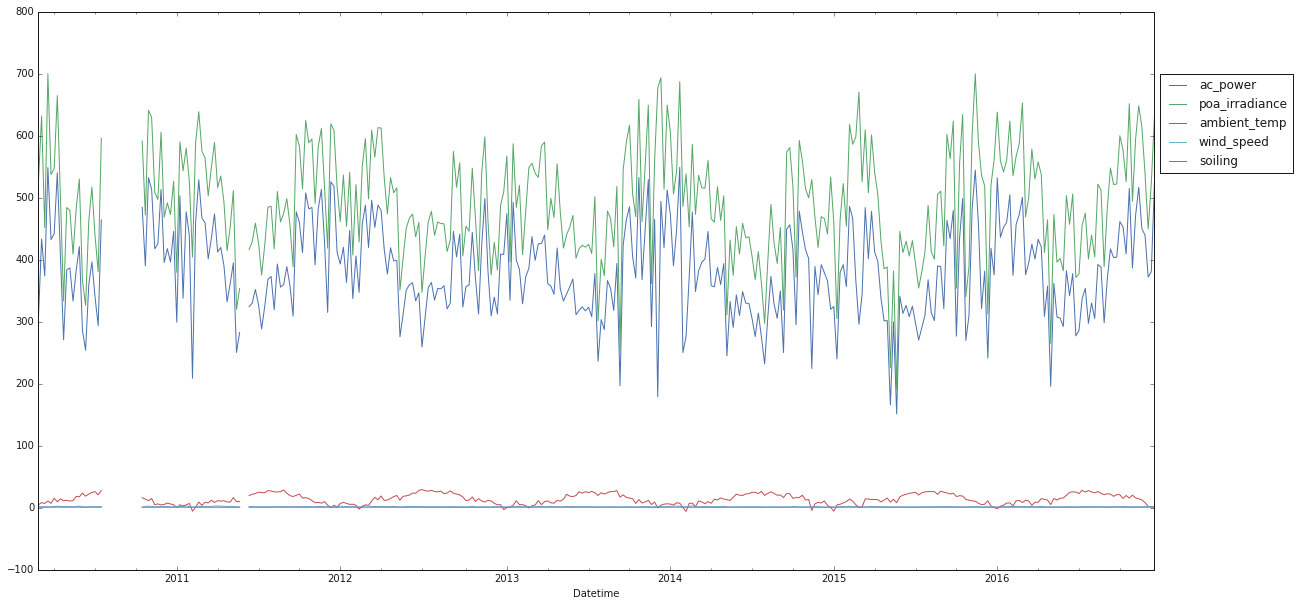

In [ ]:
f=plt.figure()
data.resample('W').mean().plot( figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, .8))
plt.show()

<Figure size 432x288 with 0 Axes>

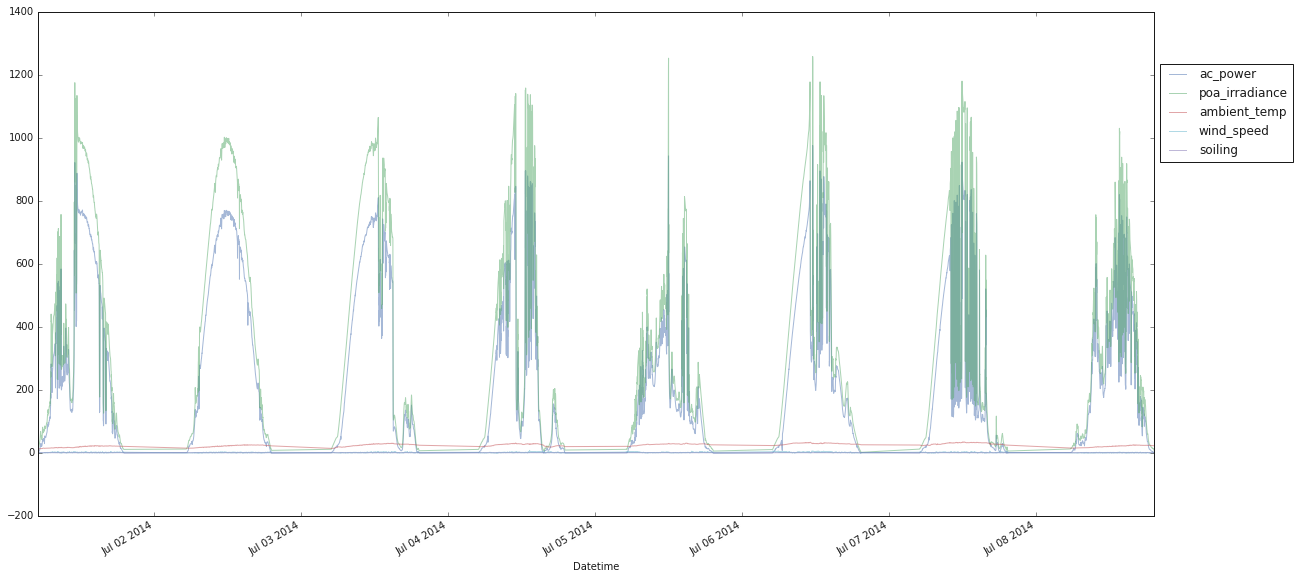

In [ ]:
f=plt.figure()
data['2014-07-01':'2014-07-08'].plot(alpha=0.5, style='-', figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, .8))
plt.show()

<Figure size 432x288 with 0 Axes>

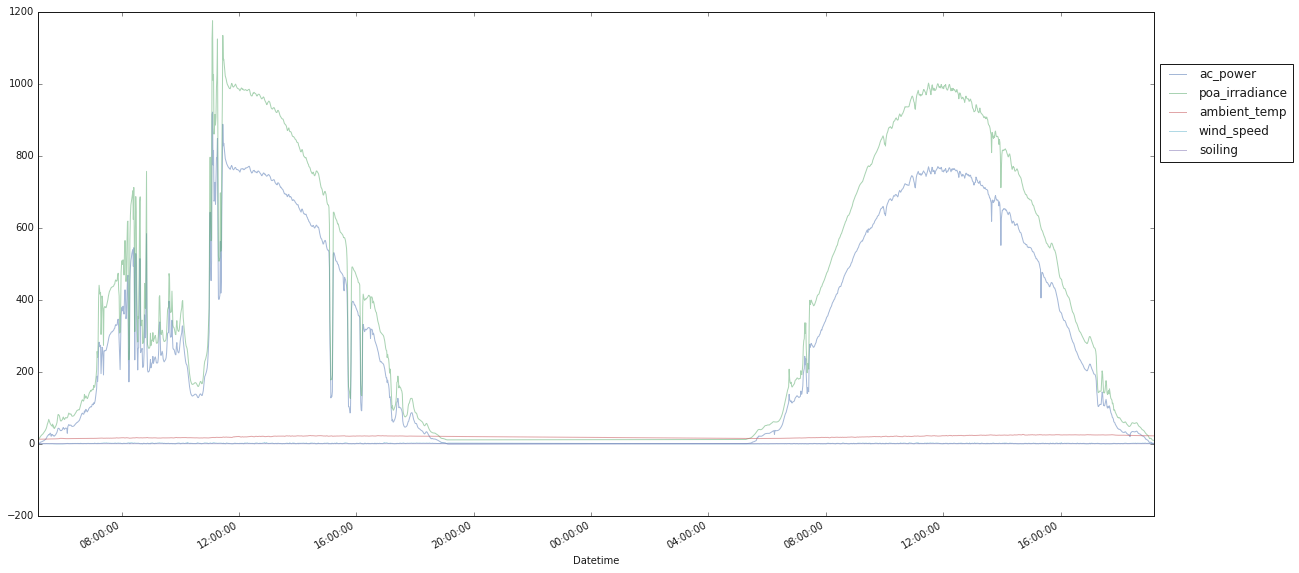

In [ ]:
f=plt.figure()
data['2014-07-01':'2014-07-02'].plot(alpha=0.5, style='-', figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, .8))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f071d246190> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


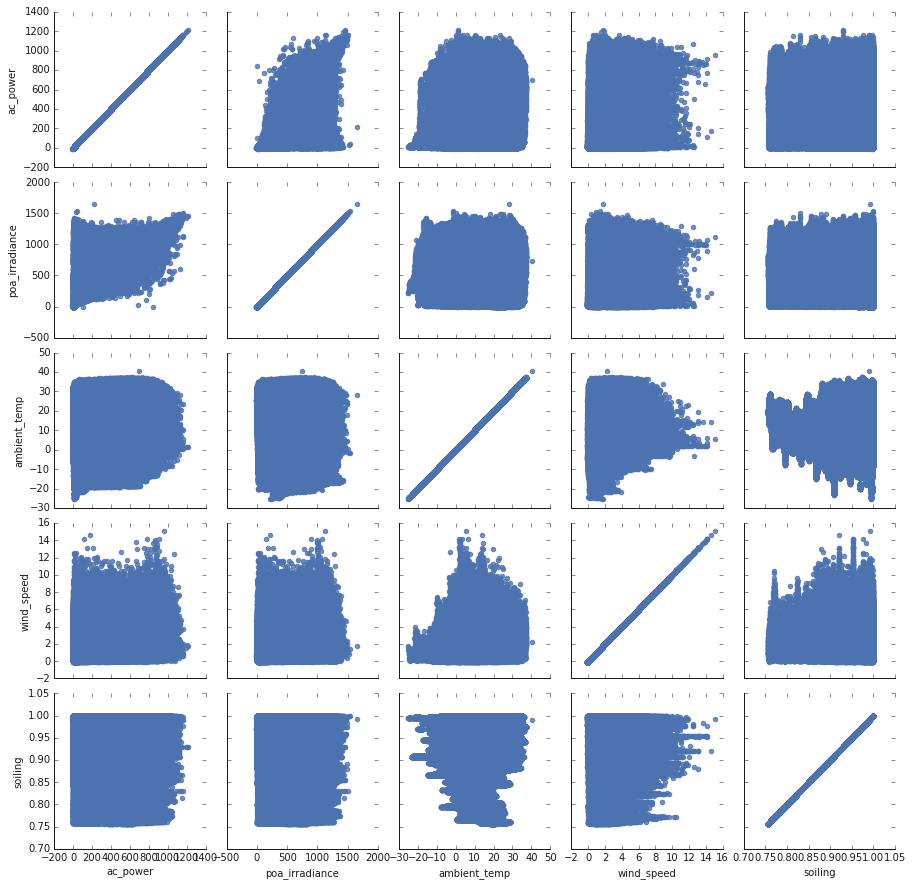

In [ ]:
g = sns.PairGrid(data, vars=['ac_power', 'poa_irradiance', 'ambient_temp', 'wind_speed','soiling'],
                 palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

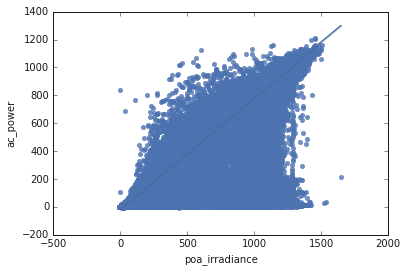

In [ ]:
sns.regplot(x="poa_irradiance", y="ac_power", data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


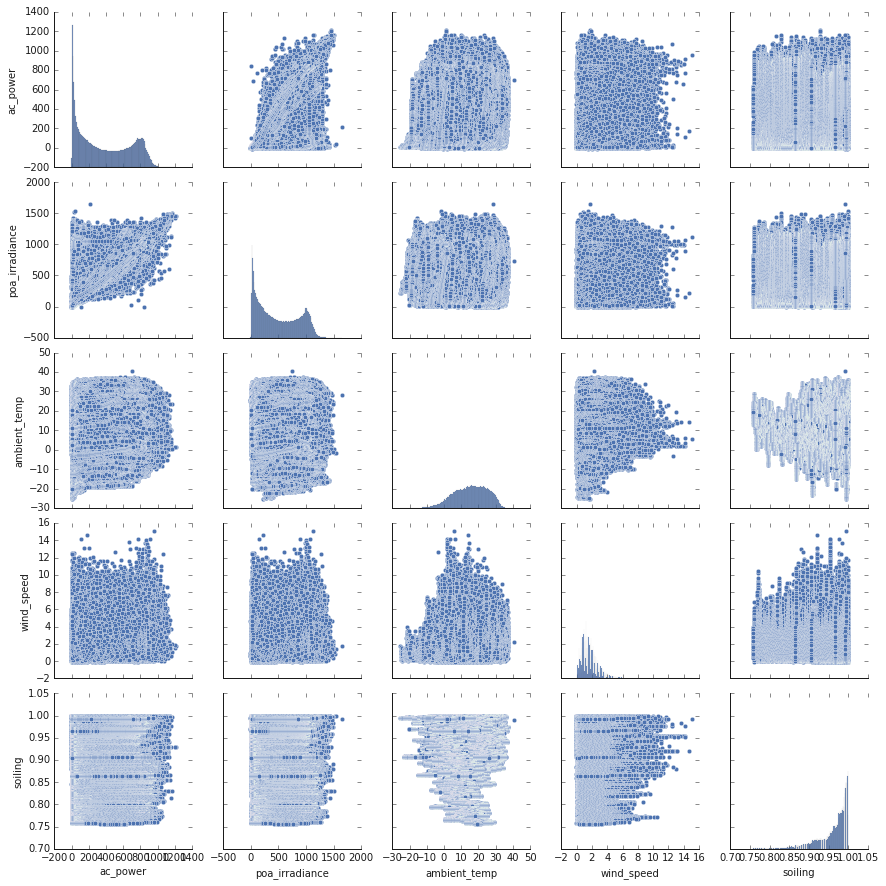

In [ ]:
sns.pairplot(data, size=2.5);

In [ ]:
data.describe()

,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling
count,1.541277e+06,1.541277e+06,1.541277e+06,1.541277e+06,1.541277e+06
mean,3.767340e+02,4.846946e+02,1.533884e+01,1.778307e+00,9.599768e-01
std,3.018819e+02,3.686146e+02,9.689413e+00,1.204422e+00,4.317632e-02
min,-9.299000e+00,-8.364000e+00,-2.530800e+01,-1.050000e-01,7.570000e-01
25%,8.409300e+01,1.382060e+02,8.320000e+00,9.440000e-01,9.430000e-01
50%,3.175930e+02,4.089000e+02,1.596200e+01,1.510000e+00,9.760000e-01
75%,6.679960e+02,8.331530e+02,2.298200e+01,2.331000e+00,9.910000e-01
max,1.210800e+03,1.646610e+03,4.058700e+01,1.504700e+01,1.000000e+00


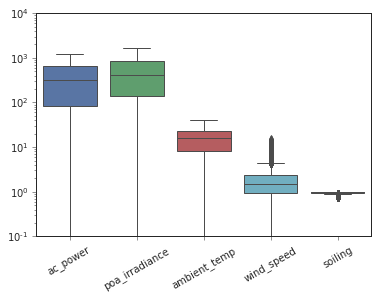

In [ ]:
import matplotlib.pylab as plt
with sns.axes_style(style='ticks'):
    g = sns.boxplot(data=data)
    g.set(yscale="log")
    g.set_xticklabels(g.get_xticklabels(),rotation=30)

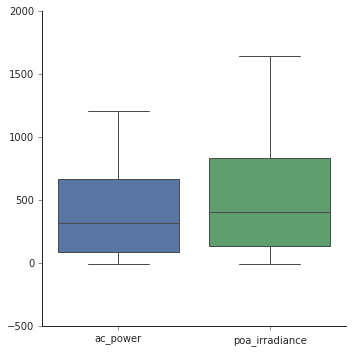

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data=data[{'poa_irradiance','ac_power'}], kind="box")
    #g.set_axis_labels(data.columns);

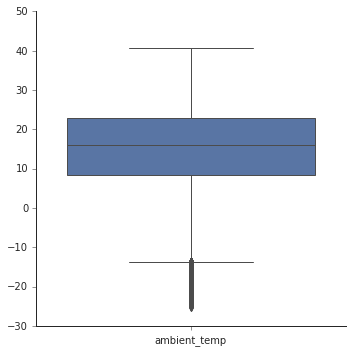

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data=data[{'ambient_temp'}], kind="box")
    #g.set_axis_labels(data.columns);

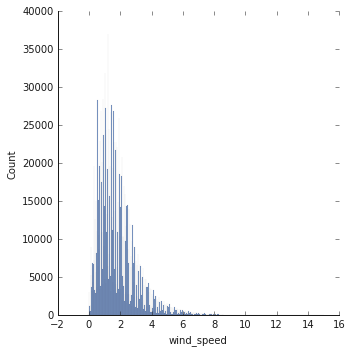

In [ ]:
sns.displot(data['wind_speed'])

In [ ]:
# Compute a correlation matrix and convert to long-form
corr_mat = data.corr().stack().reset_index(name="correlation")
corr_mat[corr_mat['level_0']=='ac_power']

,level_0,level_1,correlation
0,ac_power,ac_power,1.000000
1,ac_power,poa_irradiance,0.970545
2,ac_power,ambient_temp,0.139751
3,ac_power,wind_speed,0.203768
4,ac_power,soiling,-0.021665


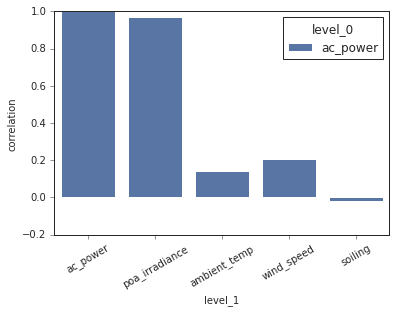

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.barplot(x="level_1", y="correlation", 
                    hue="level_0",
                    data=corr_mat[corr_mat['level_0']=='ac_power'])
    g.set_xticklabels(g.get_xticklabels(),rotation=30)

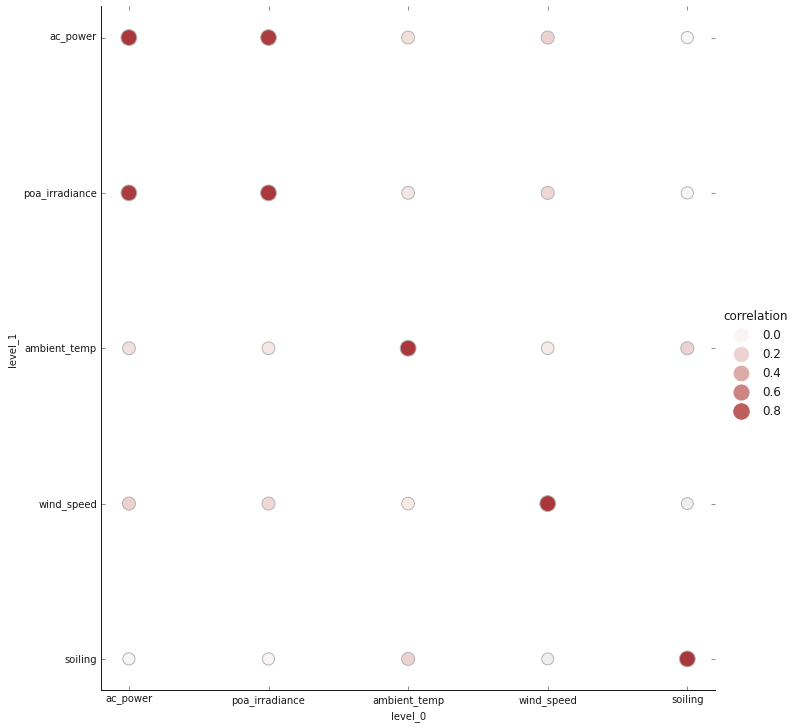

In [ ]:
# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-1, 1),
)

### SANITIZE: Data Wrangling (Preparation, Transformation, and Cleansing)

### DESCRIPTIVE ANALYTICS: Gain insight from data ("Understand the past")

### PREDICTIVE ANALYTICS: Modeling to make predictions ("Predict the future")

### PRESCRIPTIVE ANALYTICS: Modeling to make recommendations ("Change the future")

## ***UNSUPERVISED LEARNING ***

**KMeans Clustering Example**

[Reference Link](https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187)

In [ ]:
data
x = data[['poa_irradiance','ambient_temp','wind_speed','soiling']]
y = data['ac_power']
data

,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling
Datetime,,,,,
2010-02-25 14:16:00,62.464,96.550,4.017,0.564,1.000
2010-02-25 14:17:00,84.915,103.570,3.990,1.004,1.000
2010-02-25 14:18:00,94.197,108.960,3.926,1.459,1.000
2010-02-25 14:19:00,27.059,115.050,3.854,1.326,1.000
2010-02-25 14:20:00,79.618,127.720,3.792,1.899,1.000
...,...,...,...,...,...
2016-12-13 09:53:00,701.066,839.505,1.485,2.357,0.992
2016-12-13 09:54:00,713.114,851.519,1.300,2.453,0.992
2016-12-13 09:55:00,712.889,851.149,1.218,1.338,0.992


To start, let’s consider the value of k as 5. We will implement k-means clustering using k=5. For this we will instantiate the KMeans class and assign it to the variable kmeans5

In [ ]:
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[1 1 1 ... 4 4 4]


array([[1.02982325e+03, 1.68819644e+01, 2.14445506e+00, 9.58908701e-01],
       [7.79238511e+01, 1.39075395e+01, 1.55412558e+00, 9.61639490e-01],
       [5.24493363e+02, 1.55781290e+01, 1.75337774e+00, 9.58695339e-01],
       [2.81205034e+02, 1.47882404e+01, 1.64631660e+00, 9.59134274e-01],
       [7.85835535e+02, 1.65783524e+01, 1.92958651e+00, 9.60442504e-01]])

In order to calculate the optimal number of clusters for this dataset, we will use the Elbow Method. The code and plot below represents the elbow method.

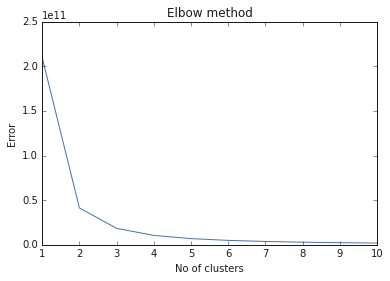

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

From the above plot, we can conclude that the optimal number of clusters is k=3, as the elbow is sharpest at 3

In [ ]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[1 1 1 ... 0 0 0]


array([[9.59162939e+02, 1.68213241e+01, 2.07955278e+00, 9.59556330e-01],
       [1.32055619e+02, 1.41599531e+01, 1.57842305e+00, 9.60870703e-01],
       [5.21757394e+02, 1.55879311e+01, 1.76030696e+00, 9.58938141e-01]])

Text(0, 0.5, 'AC Power')

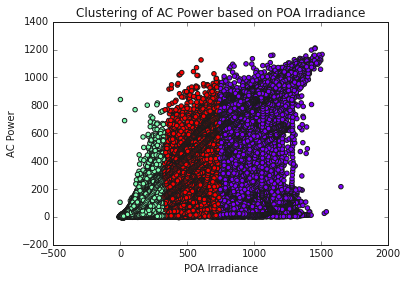

In [ ]:
plt.scatter(x['poa_irradiance'], y, c=y_kmeans3, cmap='rainbow')
plt.title('Clustering of AC Power based on POA Irradiance')
plt.xlabel('POA Irradiance')
plt.ylabel('AC Power')

Text(0, 0.5, 'AC Power')

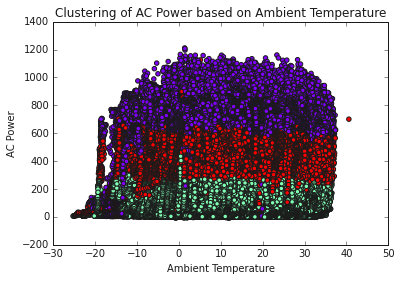

In [ ]:
plt.scatter(x['ambient_temp'], y, c=y_kmeans3, cmap='rainbow')
plt.title('Clustering of AC Power based on Ambient Temperature')
plt.xlabel('Ambient Temperature')
plt.ylabel('AC Power')

Text(0, 0.5, 'AC Power')

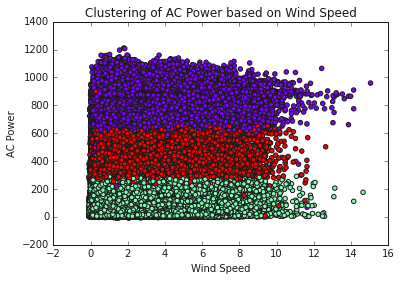

In [ ]:
plt.scatter(x['wind_speed'], y, c=y_kmeans3, cmap='rainbow')
plt.title('Clustering of AC Power based on Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('AC Power')

Text(0, 0.5, 'AC Power')

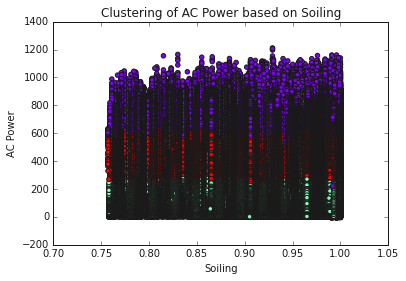

In [ ]:
plt.scatter(x['soiling'], y, c=y_kmeans3, cmap='rainbow')
plt.title('Clustering of AC Power based on Soiling')
plt.xlabel('Soiling')
plt.ylabel('AC Power')

From the above plots, it can be concluded that there are 3 significant clusters in the data. The KMeans Clustering works perfectly well for Wind Speed, POA Irradiance, and Ambient Temperature. The clusters formed for Soiling are not good enough. The reason for this maybe that the data points for soiling are very close to each other. Whereas for the other three variables, the data is spread over a wide range.

**Hierarchical Clustering (Predictor: POA Irradiance, Response: AC Power)**

In order to convert the data in a 2-D feature space, we will only consider 'POA Irradiance' and 'AC Power'.  

Further, in order to plot a Dendrogram, we import the hierarchy class of the scipy.cluster library as shc. The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

[Reference Link](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)

In [ ]:
df = data.iloc[0:499, 0:2].values
df

array([[ 6.24640e+01,  9.65500e+01],
       [ 8.49150e+01,  1.03570e+02],
       [ 9.41970e+01,  1.08960e+02],
       [ 2.70590e+01,  1.15050e+02],
       [ 7.96180e+01,  1.27720e+02],
       [ 6.74630e+01,  1.38120e+02],
       [ 4.07780e+01,  1.53110e+02],
       [ 1.69499e+02,  1.69720e+02],
       [ 1.51932e+02,  1.86250e+02],
       [ 1.50478e+02,  2.05380e+02],
       [ 2.09925e+02,  2.18850e+02],
       [ 4.26220e+01,  2.31630e+02],
       [ 1.04470e+02,  2.01900e+02],
       [ 1.65442e+02,  1.94480e+02],
       [ 6.79420e+01,  1.87010e+02],
       [ 5.05720e+01,  1.82900e+02],
       [ 1.28297e+02,  1.76300e+02],
       [ 1.24697e+02,  1.67190e+02],
       [ 1.09259e+02,  1.56120e+02],
       [ 2.02370e+01,  1.45750e+02],
       [ 5.56000e-01,  1.41710e+02],
       [ 8.28060e+01,  1.45060e+02],
       [ 1.10702e+02,  1.53810e+02],
       [ 9.52320e+01,  1.63520e+02],
       [ 1.04321e+02,  1.73030e+02],
       [ 1.23959e+02,  1.82780e+02],
       [ 1.28264e+02,  1.92610e+02],
 

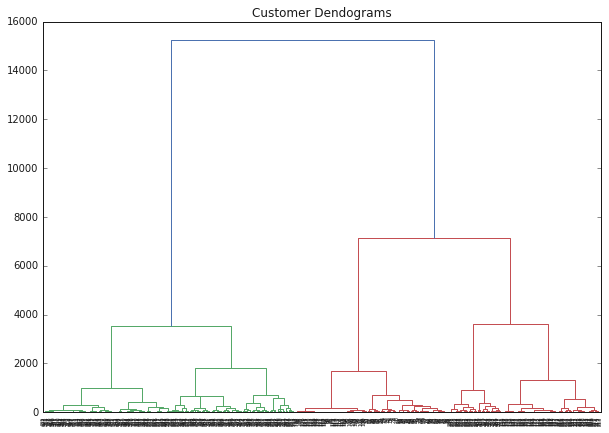

In [ ]:

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

From the above dendrogram, we can see that there are 4 clusters in the data (POA Irradiance, AC Power)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Text(0, 0.5, 'AC Power')

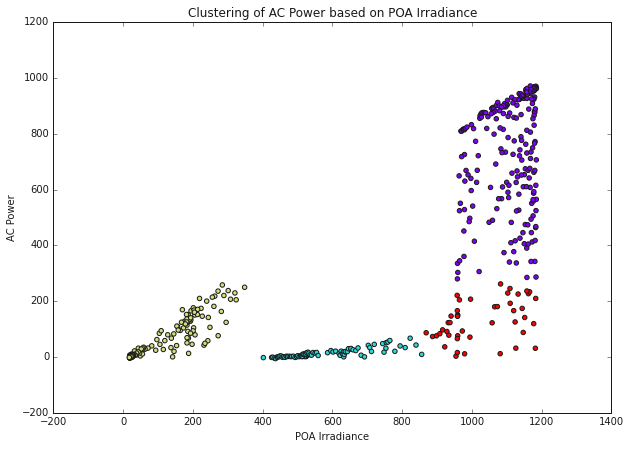

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df[:,1], df[:,0], c=cluster.labels_, cmap='rainbow')

plt.title('Clustering of AC Power based on POA Irradiance')
plt.xlabel('POA Irradiance')
plt.ylabel('AC Power')

Based on Hierarchical Clustering, there are 4 clusters as opposed to 3 clusters formed using KMEANS Clustering.

**Gaussian Mixture Model**

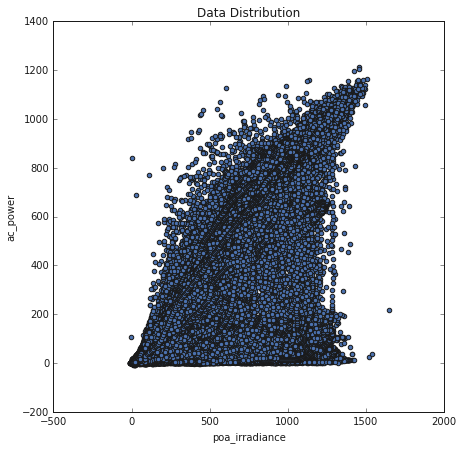

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(data['poa_irradiance'],data['ac_power'])
plt.xlabel('poa_irradiance')
plt.ylabel('ac_power')
plt.title('Data Distribution')
plt.show()

The above plot is to see the distribution of the data 

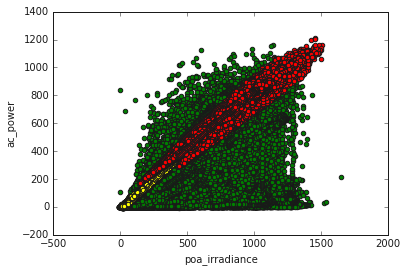

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(data[['poa_irradiance','ac_power']])

#predictions from gmm
labels = gmm.predict(data[['poa_irradiance','ac_power']])
frame = pd.DataFrame(data[['poa_irradiance','ac_power']])
frame['cluster'] = labels
frame.columns = ['poa_irradiance', 'ac_power', 'cluster']

color=['yellow','green','red']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["poa_irradiance"],data["ac_power"],c=color[k])
plt.xlabel('poa_irradiance')
plt.ylabel('ac_power')
plt.show()

The 3 clusters formed using GMM are shown in the plot above. They are different than KMEANS. They cannot be compared with Hierarchical as the data used in Hierarchical was less (for computational purposes).

## **SUPERVISED LEARNING - REGRESSION**

**LINEAR REGRESSION**

In [6]:
data

,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling
Datetime,,,,,
2010-02-25 14:16:00,62.464,96.550,4.017,0.564,1.000
2010-02-25 14:17:00,84.915,103.570,3.990,1.004,1.000
2010-02-25 14:18:00,94.197,108.960,3.926,1.459,1.000
2010-02-25 14:19:00,27.059,115.050,3.854,1.326,1.000
2010-02-25 14:20:00,79.618,127.720,3.792,1.899,1.000
...,...,...,...,...,...
2016-12-13 09:53:00,701.066,839.505,1.485,2.357,0.992
2016-12-13 09:54:00,713.114,851.519,1.300,2.453,0.992
2016-12-13 09:55:00,712.889,851.149,1.218,1.338,0.992


In [7]:
#Using the data for the year 2015 for the purpose of this example
df =data['2015-01-01':'2015-12-31']
df

,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling
Datetime,,,,,
2015-01-01 07:28:00,4.709,22.264,-9.970,1.135,0.967
2015-01-01 07:29:00,17.865,53.855,-10.049,0.901,0.967
2015-01-01 07:30:00,30.056,81.354,-9.932,0.958,0.967
2015-01-01 07:31:00,37.455,97.962,-9.874,0.954,0.967
2015-01-01 07:32:00,41.845,106.688,-9.856,0.906,0.967
...,...,...,...,...,...
2015-12-31 10:06:00,709.122,827.149,-6.770,0.844,0.943
2015-12-31 10:07:00,725.617,845.042,-6.755,1.640,0.943
2015-12-31 10:08:00,754.878,883.269,-6.767,1.173,0.943


In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# Creating the Predictor and Response Variables
X = pd.DataFrame([])
X = df[df.columns[1:]]
y = df['ac_power'].to_numpy()
y = y.reshape(-1,1)
#Scaling the data
sc_X = StandardScaler()
sc_y = StandardScaler()

scaled_x = sc_X.fit_transform(X)

scaled_y=sc_y.fit_transform(y)
#Using the Linear Regression Model to predict the output
regressor = LinearRegression()
regressor.fit(scaled_x,scaled_y.ravel())
y_pred = regressor.predict(scaled_x)
y_pred=sc_y.inverse_transform(y_pred)
#Saving the predicted output in a dataframe
y_pred=pd.DataFrame(y_pred)
#Saving the actual output in a dataframe
y=pd.DataFrame(y)
#Calculating the R squared and Mean Squared Error Values
test_set_rmse = (np.sqrt(mean_squared_error(y, y_pred)))
test_set_r2 = r2_score(y, y_pred)
print(test_set_rmse)
print(test_set_r2)

81.38398970554037
0.9254503697367868


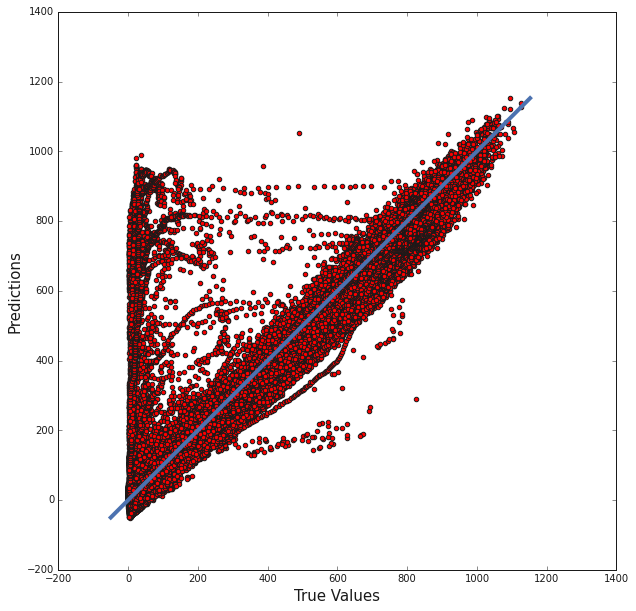

In [ ]:
#Diagnostic Plot showing how Regression line fits the data
plt.figure(figsize=(10,10))
plt.scatter(y[0], y_pred[0], c='red')


p1 = max(max(y_pred[0]), max(y[0]))
p2 = min(min(y_pred[0]), min(y[0]))
plt.plot([p1, p2], [p1, p2], 'b-', linewidth=4)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

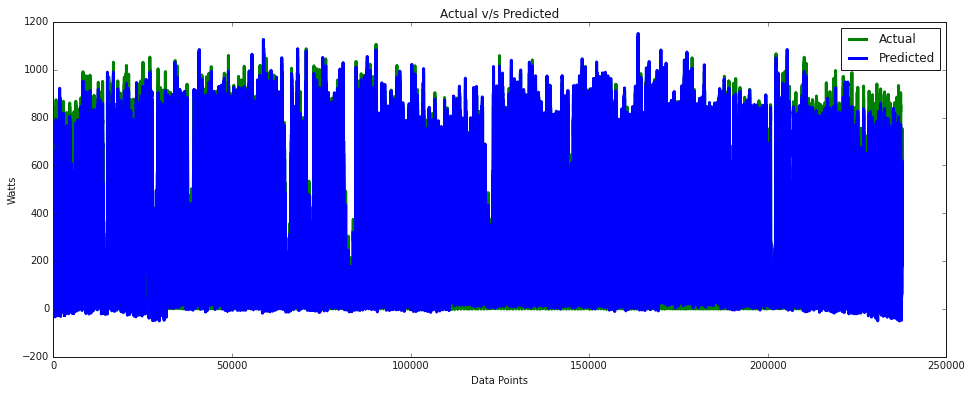

In [ ]:
#Time series plot comparing Actual and Predicted AC Power
plt.figure(figsize=(16,6)) 
plt.plot(list(y.index), y[0],c='green',linewidth=3, label='Actual')
plt.plot(list(y_pred.index), y_pred[0],c='blue', linewidth=3, label='Predicted')

plt.legend(loc='upper right')
plt.title('Actual v/s Predicted')
plt.xlabel('Data Points')
plt.ylabel('Watts')
plt.show()

In [ ]:
#Predicting Values
df_pred = data['2016-01-01']
df_pred

,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling
Datetime,,,,,
2016-01-01 07:26:00,23.517,70.911,-11.981,1.622,0.942
2016-01-01 07:27:00,28.731,82.528,-11.617,1.459,0.942
2016-01-01 07:28:00,32.397,89.511,-11.365,1.397,0.942
2016-01-01 07:29:00,38.098,101.189,-10.967,1.450,0.942
2016-01-01 07:30:00,44.138,113.770,-10.717,0.897,0.942
...,...,...,...,...,...
2016-01-01 16:22:00,4.404,12.316,-0.127,1.894,0.942
2016-01-01 16:23:00,4.043,11.835,-0.234,1.885,0.942
2016-01-01 16:24:00,3.660,11.535,-0.315,1.918,0.942


In [ ]:
#Using the trained regression model on data not used for training
blind_test_x = df_pred[['poa_irradiance','soiling','ambient_temp','wind_speed']]
scaled_x_1 = sc_X.fit_transform(blind_test_x)
new_pred=regressor.predict(scaled_x_1)
new_pred=sc_y.inverse_transform(new_pred)
new_pred=pd.DataFrame(new_pred)
new_pred

,0
0,-292.437482
1,-283.338243
2,-277.282542
3,-264.849695
4,-260.829823
...,...
534,-326.430672
535,-327.177729
536,-327.087955
537,-326.693619


In [ ]:
#Adding the actual AC Power to new_pred dataframe
new_pred['ac'] = df_pred['ac_power'].copy().reset_index(drop=True)
new_pred

,0,ac
0,-292.437482,23.517
1,-283.338243,28.731
2,-277.282542,32.397
3,-264.849695,38.098
4,-260.829823,44.138
...,...,...
534,-326.430672,4.404
535,-327.177729,4.043
536,-327.087955,3.660
537,-326.693619,3.308


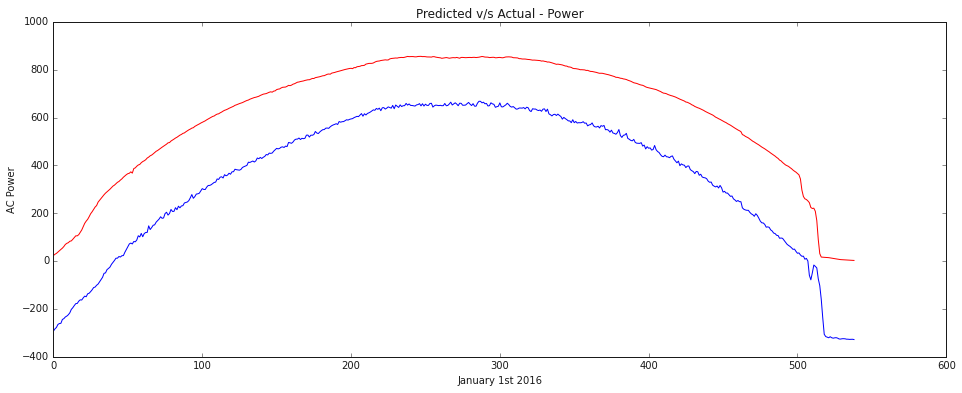

In [ ]:
#Time series plot comparing the blindly predicted values with actual values
plt.figure(figsize=(16,6)) 
plt.plot(new_pred.index, new_pred['ac'],c='red')
plt.plot(new_pred.index, new_pred[0],c='blue') 

plt.title('Predicted v/s Actual - Power')
plt.xlabel('January 1st 2016')
plt.ylabel('AC Power')
plt.show()

In [ ]:
#Performance metrics for blindly predicted values
test_set_rmse = (np.sqrt(mean_squared_error(new_pred['ac'], new_pred[0])))
test_set_r2 = r2_score(new_pred['ac'], new_pred[0])
print(test_set_rmse)
print(test_set_r2)

260.4897976405932
-0.10274537381776683


**DECISION TREES REGRESSION**

In [ ]:
#Decision Trees Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# Creating the Predictor and Response Variables
X = pd.DataFrame([])
X = df[df.columns[1:]]
y = df['ac_power'].to_numpy()
y = y.reshape(-1,1)
#Scaling the data
sc_X = StandardScaler()
sc_y = StandardScaler()

scaled_x = sc_X.fit_transform(X)

scaled_y=sc_y.fit_transform(y)
#Using the Linear Regression Model to predict the output
regressor = DecisionTreeRegressor()
regressor.fit(scaled_x,scaled_y.ravel())
y_pred = regressor.predict(scaled_x)
y_pred=sc_y.inverse_transform(y_pred)
#Saving the predicted output in a dataframe
y_pred=pd.DataFrame(y_pred)
#Saving the actual output in a dataframe
y=pd.DataFrame(y)
#Calculating the R squared and Mean Squared Error Values
test_set_rmse = (np.sqrt(mean_squared_error(y, y_pred)))
test_set_r2 = r2_score(y, y_pred)
print(test_set_rmse)
print(test_set_r2)

0.020552248043854797
0.9999999952457042


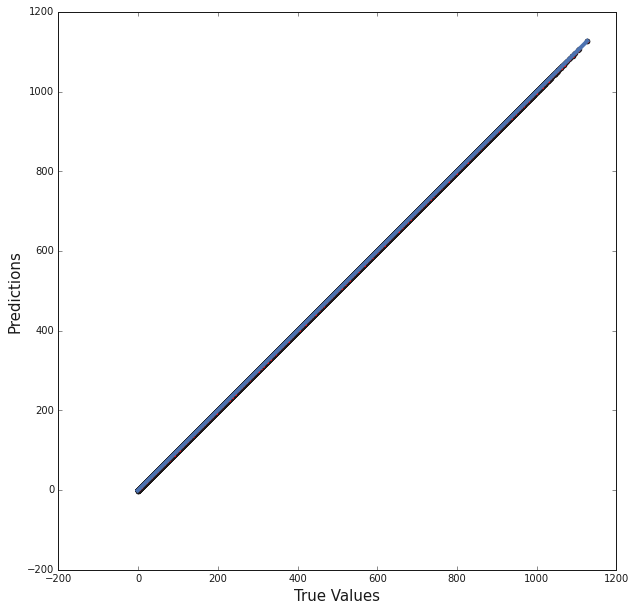

In [ ]:
#Diagnostic Plot showing how Regression line fits the data
plt.figure(figsize=(10,10))
plt.scatter(y[0], y_pred[0], c='red')


p1 = max(max(y_pred[0]), max(y[0]))
p2 = min(min(y_pred[0]), min(y[0]))
plt.plot([p1, p2], [p1, p2], 'b-', linewidth=4)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

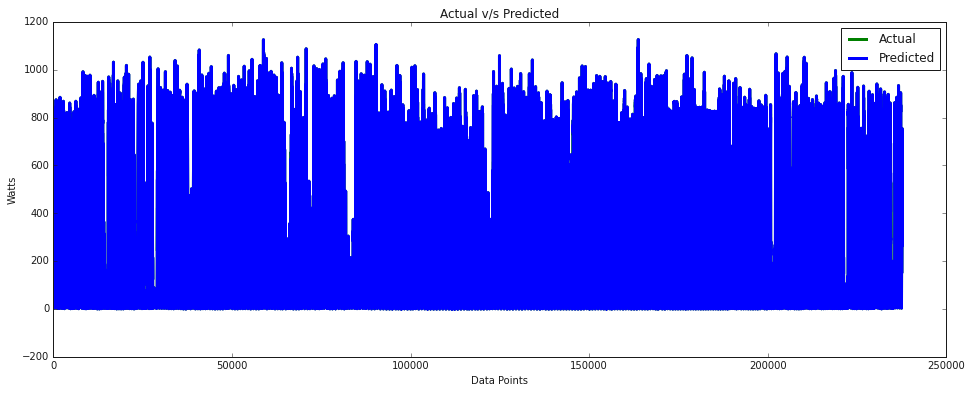

In [ ]:
#Time series plot comparing Actual and Predicted AC Power
plt.figure(figsize=(16,6)) 
plt.plot(list(y.index), y[0],c='green',linewidth=3, label='Actual')
plt.plot(list(y_pred.index), y_pred[0],c='blue', linewidth=3, label='Predicted')

plt.legend(loc='upper right')
plt.title('Actual v/s Predicted')
plt.xlabel('Data Points')
plt.ylabel('Watts')
plt.show()

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, filled=True)

In [ ]:
#Predicting Values
df_pred = data['2016-01-01']
df_pred

,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling
Datetime,,,,,
2016-01-01 07:26:00,23.517,70.911,-11.981,1.622,0.942
2016-01-01 07:27:00,28.731,82.528,-11.617,1.459,0.942
2016-01-01 07:28:00,32.397,89.511,-11.365,1.397,0.942
2016-01-01 07:29:00,38.098,101.189,-10.967,1.450,0.942
2016-01-01 07:30:00,44.138,113.770,-10.717,0.897,0.942
...,...,...,...,...,...
2016-01-01 16:22:00,4.404,12.316,-0.127,1.894,0.942
2016-01-01 16:23:00,4.043,11.835,-0.234,1.885,0.942
2016-01-01 16:24:00,3.660,11.535,-0.315,1.918,0.942


In [ ]:
#Using the trained regression model on data not used for training
blind_test_x = df_pred[['poa_irradiance','soiling','ambient_temp','wind_speed']]
scaled_x_1 = sc_X.fit_transform(blind_test_x)
new_pred=regressor.predict(scaled_x_1)
new_pred=sc_y.inverse_transform(new_pred)
new_pred=pd.DataFrame(new_pred)
new_pred

,0
0,-0.158
1,-0.158
2,-0.158
3,-0.158
4,-0.158
...,...
534,-0.158
535,-0.158
536,-0.158
537,-0.158


In [ ]:
#Adding the actual AC Power to new_pred dataframe
new_pred['ac'] = df_pred['ac_power'].copy().reset_index(drop=True)
new_pred

,0,ac
0,-0.158,23.517
1,-0.158,28.731
2,-0.158,32.397
3,-0.158,38.098
4,-0.158,44.138
...,...,...
534,-0.158,4.404
535,-0.158,4.043
536,-0.158,3.660
537,-0.158,3.308


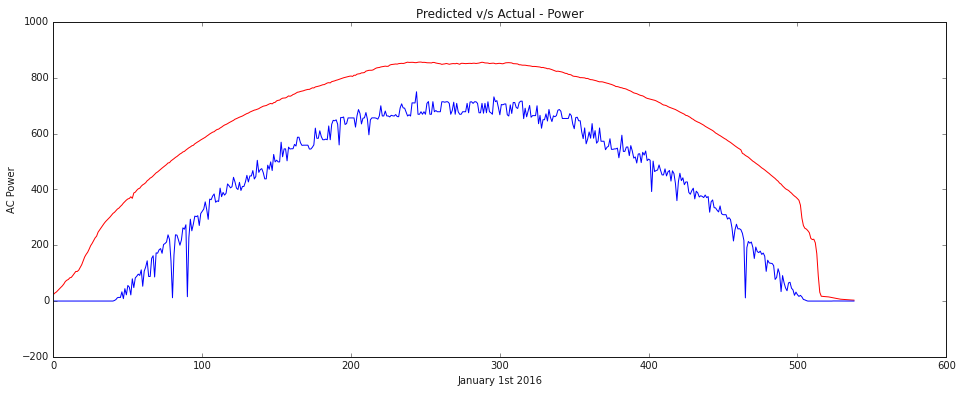

In [ ]:
#Time series plot comparing the blindly predicted values with actual values
plt.figure(figsize=(16,6)) 
plt.plot(new_pred.index, new_pred['ac'],c='red')
plt.plot(new_pred.index, new_pred[0],c='blue') 

plt.title('Predicted v/s Actual - Power')
plt.xlabel('January 1st 2016')
plt.ylabel('AC Power')
plt.show()

In [ ]:
#Performance metrics for blindly predicted values
test_set_rmse = (np.sqrt(mean_squared_error(new_pred['ac'], new_pred[0])))
test_set_r2 = r2_score(new_pred['ac'], new_pred[0])
print(test_set_rmse)
print(test_set_r2)

225.55526878164682
0.17320134701068657


**GAUSSIAN PROCESS REGRESSION**

For the purpose of illustration, we will use a smaller dataset. This technique is computationally expensive and fails to execute when using the entire dataset.

In [ ]:
#Creating small dataset
df_gp = data['2016-01-01']
df_gp

,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling
Datetime,,,,,
2016-01-01 07:26:00,23.517,70.911,-11.981,1.622,0.942
2016-01-01 07:27:00,28.731,82.528,-11.617,1.459,0.942
2016-01-01 07:28:00,32.397,89.511,-11.365,1.397,0.942
2016-01-01 07:29:00,38.098,101.189,-10.967,1.450,0.942
2016-01-01 07:30:00,44.138,113.770,-10.717,0.897,0.942
...,...,...,...,...,...
2016-01-01 16:22:00,4.404,12.316,-0.127,1.894,0.942
2016-01-01 16:23:00,4.043,11.835,-0.234,1.885,0.942
2016-01-01 16:24:00,3.660,11.535,-0.315,1.918,0.942


In [ ]:
#Gaussian Process Regression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# Creating the Predictor and Response Variables
X = pd.DataFrame([])
X = df_gp[df_gp.columns[1:]]
y = df_gp['ac_power'].to_numpy()
y = y.reshape(-1,1)
#Scaling the data
sc_X = StandardScaler()
sc_y = StandardScaler()

scaled_x = sc_X.fit_transform(X)

scaled_y=sc_y.fit_transform(y)
#Using the Linear Regression Model to predict the output
regressor = GaussianProcessRegressor()
regressor.fit(scaled_x,scaled_y.ravel())
y_pred = regressor.predict(scaled_x)
y_pred=sc_y.inverse_transform(y_pred)
#Saving the predicted output in a dataframe
y_pred=pd.DataFrame(y_pred)
#Saving the actual output in a dataframe
y=pd.DataFrame(y)
#Calculating the R squared and Mean Squared Error Values
test_set_rmse = (np.sqrt(mean_squared_error(y, y_pred)))
test_set_r2 = r2_score(y, y_pred)
print(test_set_rmse)
print(test_set_r2)

0.62195085357705
0.9999937135430739


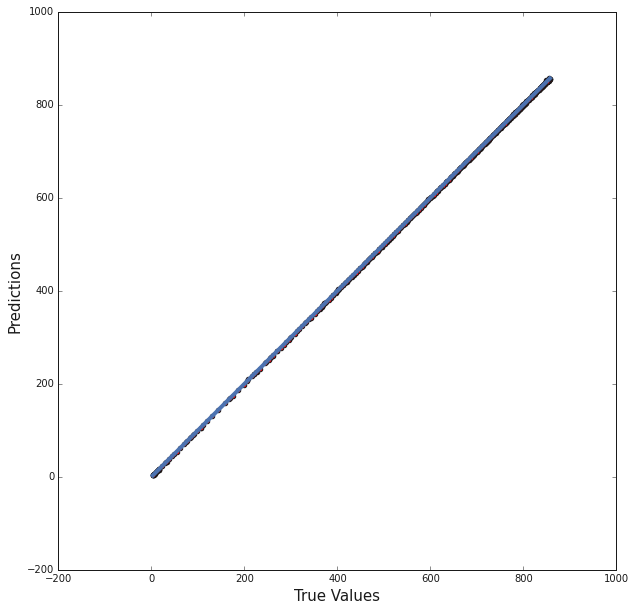

In [ ]:
#Diagnostic Plot showing how Regression line fits the data
plt.figure(figsize=(10,10))
plt.scatter(y[0], y_pred[0], c='red')


p1 = max(max(y_pred[0]), max(y[0]))
p2 = min(min(y_pred[0]), min(y[0]))
plt.plot([p1, p2], [p1, p2], 'b-', linewidth=4)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

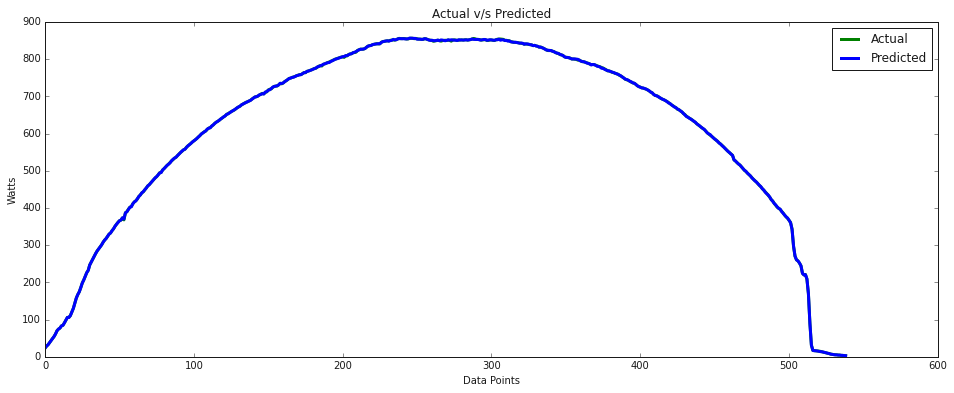

In [ ]:
#Time series plot comparing Actual and Predicted AC Power
plt.figure(figsize=(16,6)) 
plt.plot(list(y.index), y[0],c='green',linewidth=3, label='Actual')
plt.plot(list(y_pred.index), y_pred[0],c='blue', linewidth=3, label='Predicted')

plt.legend(loc='upper right')
plt.title('Actual v/s Predicted')
plt.xlabel('Data Points')
plt.ylabel('Watts')
plt.show()

There is a high possibility of overfitting in case of the Decision Trees Regression and Gaussian Process Regression models, in this example specifically.

# **ANN Regression - MLP** 

In [8]:
from sklearn.neural_network import MLPRegressor
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# Creating the Predictor and Response Variables
X = pd.DataFrame([])
X = df[df.columns[1:]]
y = df['ac_power'].to_numpy()
y = y.reshape(-1,1)
#Scaling the data
sc_X = StandardScaler()
sc_y = StandardScaler()

scaled_x = sc_X.fit_transform(X)

scaled_y=sc_y.fit_transform(y)
#Using the Linear Regression Model to predict the output
regressor = MLPRegressor()
regressor.fit(scaled_x,scaled_y.ravel())
y_pred = regressor.predict(scaled_x)
y_pred=sc_y.inverse_transform(y_pred)
#Saving the predicted output in a dataframe
y_pred=pd.DataFrame(y_pred)
#Saving the actual output in a dataframe
y=pd.DataFrame(y)
#Calculating the R squared and Mean Squared Error Values
test_set_rmse = (np.sqrt(mean_squared_error(y, y_pred)))
test_set_r2 = r2_score(y, y_pred)
print(test_set_rmse)
print(test_set_r2)

52.46541970134149
0.9690176865417651


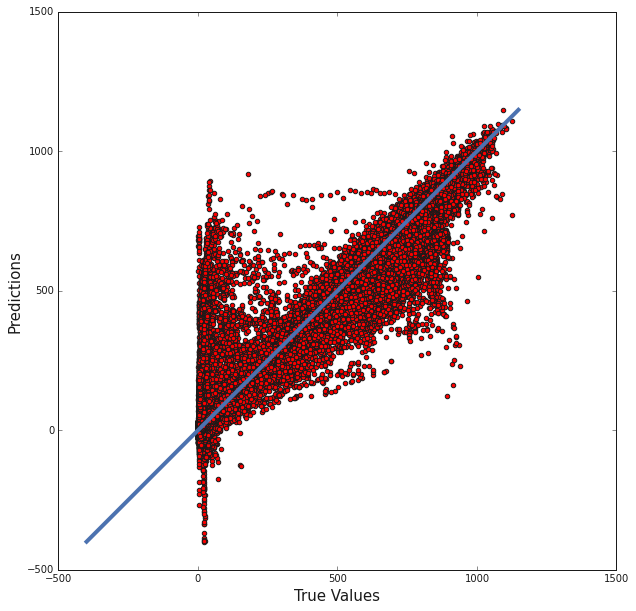

In [9]:
#Diagnostic Plot showing how Regression line fits the data
plt.figure(figsize=(10,10))
plt.scatter(y[0], y_pred[0], c='red')


p1 = max(max(y_pred[0]), max(y[0]))
p2 = min(min(y_pred[0]), min(y[0]))
plt.plot([p1, p2], [p1, p2], 'b-', linewidth=4)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

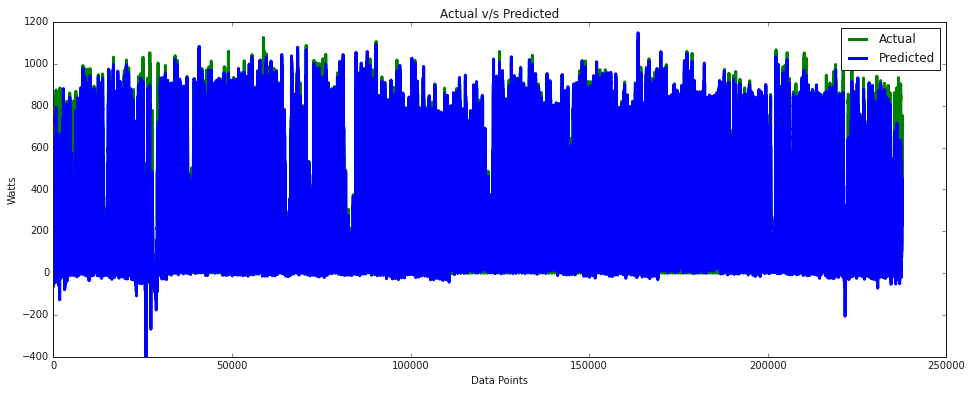

In [10]:
#Time series plot comparing Actual and Predicted AC Power
plt.figure(figsize=(16,6)) 
plt.plot(list(y.index), y[0],c='green',linewidth=3, label='Actual')
plt.plot(list(y_pred.index), y_pred[0],c='blue', linewidth=3, label='Predicted')

plt.legend(loc='upper right')
plt.title('Actual v/s Predicted')
plt.xlabel('Data Points')
plt.ylabel('Watts')
plt.show()

In [11]:
#Predicting Values
df_pred = data['2016-01-01']
df_pred

,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling
Datetime,,,,,
2016-01-01 07:26:00,23.517,70.911,-11.981,1.622,0.942
2016-01-01 07:27:00,28.731,82.528,-11.617,1.459,0.942
2016-01-01 07:28:00,32.397,89.511,-11.365,1.397,0.942
2016-01-01 07:29:00,38.098,101.189,-10.967,1.450,0.942
2016-01-01 07:30:00,44.138,113.770,-10.717,0.897,0.942
...,...,...,...,...,...
2016-01-01 16:22:00,4.404,12.316,-0.127,1.894,0.942
2016-01-01 16:23:00,4.043,11.835,-0.234,1.885,0.942
2016-01-01 16:24:00,3.660,11.535,-0.315,1.918,0.942


In [12]:
#Using the trained regression model on data not used for training
blind_test_x = df_pred[['poa_irradiance','soiling','ambient_temp','wind_speed']]
scaled_x_1 = sc_X.fit_transform(blind_test_x)
new_pred=regressor.predict(scaled_x_1)
new_pred=sc_y.inverse_transform(new_pred)
new_pred=pd.DataFrame(new_pred)
new_pred

,0
0,-233.011224
1,-235.916121
2,-223.250328
3,-217.417092
4,-216.248123
...,...
534,-363.840683
535,-363.180569
536,-361.799012
537,-359.371291


In [13]:
#Adding the actual AC Power to new_pred dataframe
new_pred['ac'] = df_pred['ac_power'].copy().reset_index(drop=True)
new_pred

,0,ac
0,-233.011224,23.517
1,-235.916121,28.731
2,-223.250328,32.397
3,-217.417092,38.098
4,-216.248123,44.138
...,...,...
534,-363.840683,4.404
535,-363.180569,4.043
536,-361.799012,3.660
537,-359.371291,3.308


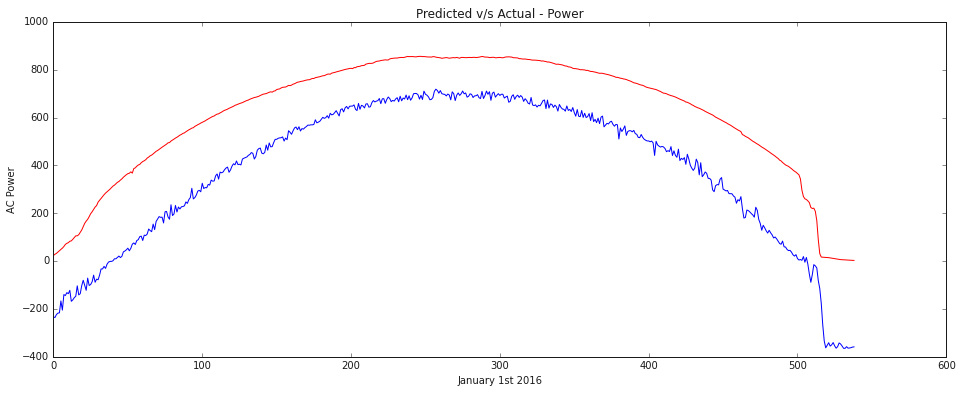

In [14]:
#Time series plot comparing the blindly predicted values with actual values
plt.figure(figsize=(16,6)) 
plt.plot(new_pred.index, new_pred['ac'],c='red')
plt.plot(new_pred.index, new_pred[0],c='blue') 

plt.title('Predicted v/s Actual - Power')
plt.xlabel('January 1st 2016')
plt.ylabel('AC Power')
plt.show()